# Predicting Loan repayment on Lending Club data

*Importing Libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Reading File*

In [3]:
df=pd.read_csv('loans.csv')

In [4]:
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0


In [6]:
df.shape

(9578, 14)

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


*There are 29 rows with missing values for 5 columns*

In [8]:
df.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [12]:
df[df['pub.rec'].isnull()][['days.with.cr.line','inq.last.6mths','delinq.2yrs','revol.util','log.annual.inc']]

,days.with.cr.line,inq.last.6mths,delinq.2yrs,revol.util,log.annual.inc
7725,NaN,NaN,NaN,NaN,11.156251
7726,NaN,NaN,NaN,NaN,NaN
7727,NaN,NaN,NaN,NaN,11.695247
7728,NaN,NaN,NaN,NaN,11.608236
7729,NaN,NaN,NaN,NaN,11.492723
7731,NaN,NaN,NaN,NaN,11.461632
7732,NaN,NaN,NaN,NaN,9.392662
7733,NaN,NaN,NaN,NaN,11.918391
7734,NaN,NaN,NaN,NaN,12.100712
7735,NaN,NaN,NaN,NaN,10.373491


## Dropping missing fields

In [35]:
df.dropna(axis=0,inplace=True)

In [37]:
df.shape

(9516, 14)

In [448]:
df.isnull().count()

credit.policy         9516
purpose               9516
int.rate              9516
installment           9516
log.annual.inc        9516
dti                   9516
fico                  9516
days.with.cr.line     9516
revol.bal             9516
revol.util            9516
inq.last.6mths        9516
delinq.2yrs           9516
pub.rec               9516
not.fully.paid        9516
all_other             9516
credit_card           9516
debt_consolidation    9516
educational           9516
home_improvement      9516
major_purchase        9516
small_business        9516
dtype: int64

# Exploratory Data Analysis

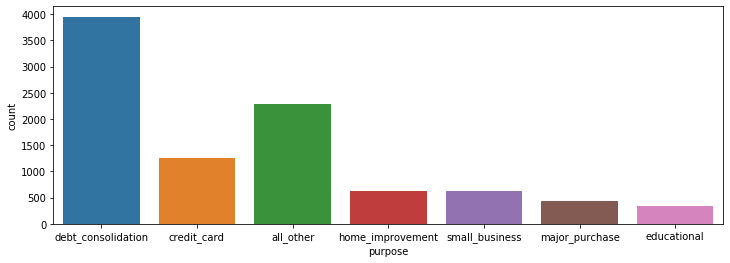

In [450]:
plt.figure(figsize=(12,4))
sns.countplot(x='purpose',data=df,orient='v')

*Debt_consolidation is the main reason for loans here*

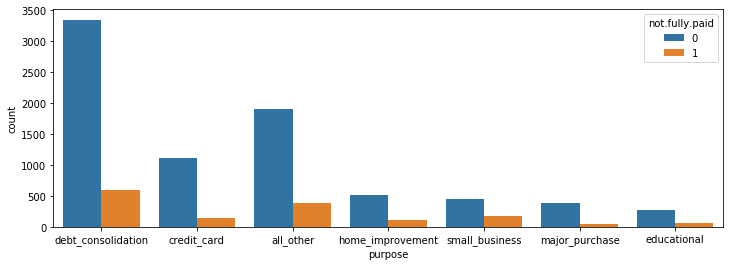

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

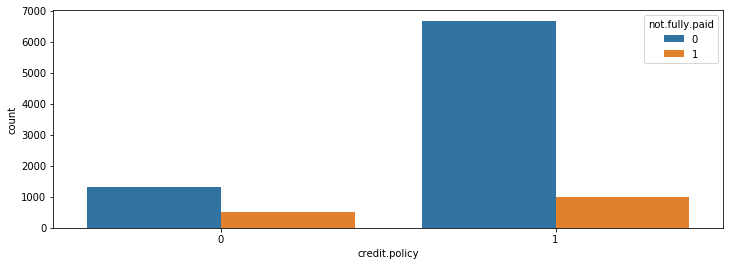

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(x='credit.policy',data=df,hue='not.fully.paid')

In [47]:
df.groupby(['credit.policy','not.fully.paid']).count()

purpose  int.rate  installment  log.annual.inc  \
credit.policy not.fully.paid                                                   
0             0                  1316      1316         1316            1316   
              1                   514       514          514             514   
1             0                  6679      6679         6679            6679   
              1                  1007      1007         1007            1007   

                               dti  fico  days.with.cr.line  revol.bal  \
credit.policy not.fully.paid                                             
0             0               1316  1316               1316       1316   
              1                514   514                514        514   
1             0               6679  6679               6679       6679   
              1               1007  1007               1007       1007   

                              revol.util  inq.last.6mths  delinq.2yrs  pub.rec  
credit.policy not.fully.paid                                                    
0             0                     1316            1316         1316     1316  
              1                      514             514          514      514  
1             0                     6679            6679         6679     6679  
              1                     1007            1007         1007     1007

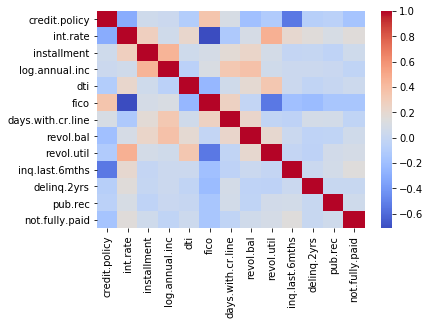

In [49]:
sns.heatmap(df.corr(),cmap='coolwarm')

*Interest Rate vs Fico*

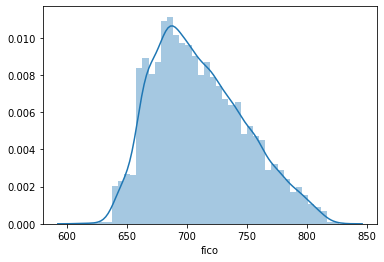

In [455]:
sns.distplot(df['fico'])

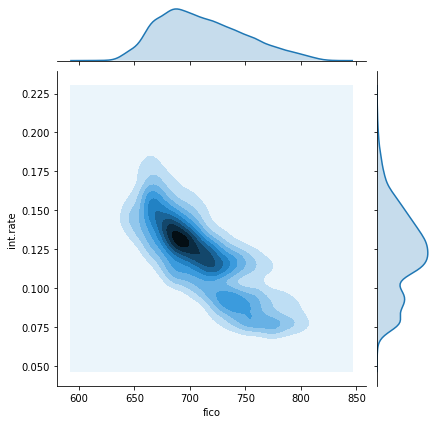

In [460]:
sns.jointplot(x='fico',y='int.rate',data=df,kind='kde')

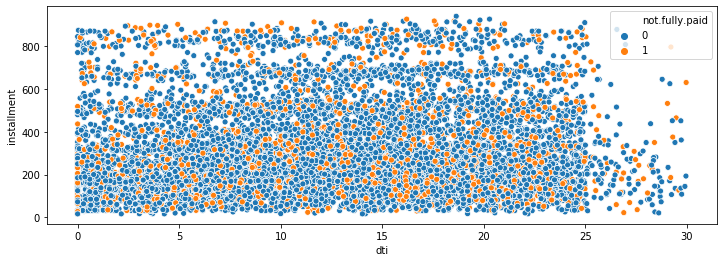

In [467]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='dti',y='installment',data=df,hue='not.fully.paid')

*Not paid loans distribution based on fico score*

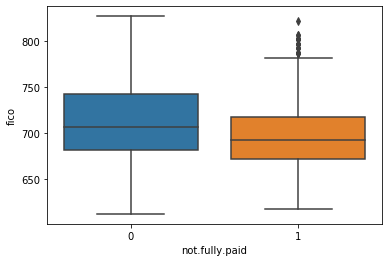

In [61]:
sns.boxplot(y='fico',x='not.fully.paid',data=df)

*Not paid loans based on interest rate assigned*

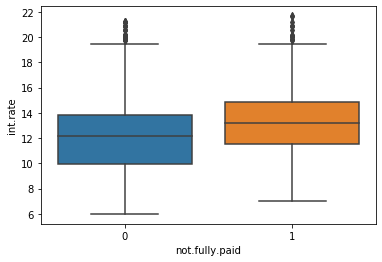

In [62]:
sns.boxplot(y='int.rate',x='not.fully.paid',data=df)

In [65]:
df['revol.util'].describe()

count    9516.000000
mean       46.865677
std        29.018642
min         0.000000
25%        22.700000
50%        46.400000
75%        71.000000
max       119.000000
Name: revol.util, dtype: float64

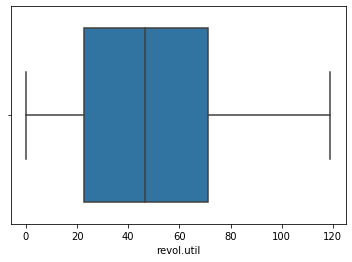

In [68]:
sns.boxplot(df['revol.util'])

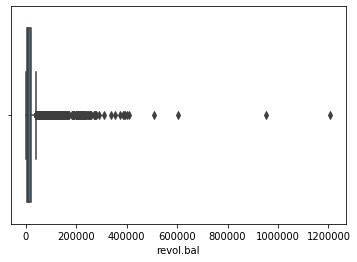

In [69]:
sns.boxplot(df['revol.bal'])

In [71]:
df['revol.bal'].max()

1207359

*Debt to Income Ratio of 36% or below is good, since max in our records is 29, we have decent customers*

In [72]:
df['dti'].describe()

count    9516.000000
mean       12.628976
std         6.886697
min         0.000000
25%         7.227500
50%        12.700000
75%        18.000000
max        29.960000
Name: dti, dtype: float64

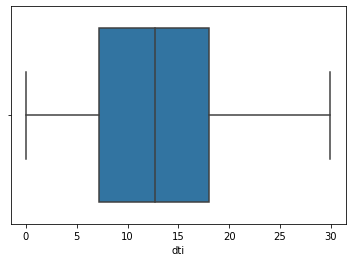

In [73]:
sns.boxplot(df['dti'])

*29 Records with revolving utilization greater than 100, as this doesnt make sense. Setting 100 and above to 100

In [83]:
df['revol.util'].loc[df['revol.util']>=100] = 100

D:\Softwares\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [93]:
df.groupby(['not.fully.paid','credit.policy','delinq.2yrs']).count()

purpose  int.rate  installment  \
not.fully.paid credit.policy delinq.2yrs                                   
0              0             0.0             1106      1106         1106   
                             1.0              136       136          136   
                             2.0               46        46           46   
                             3.0               14        14           14   
                             4.0                6         6            6   
                             5.0                3         3            3   
                             6.0                1         1            1   
                             7.0                1         1            1   
                             8.0                1         1            1   
                             11.0               1         1            1   
                             13.0               1         1            1   
               1             0.0             5970      5970         5970   
                             1.0              547       547          547   
                             2.0              112       112          112   
                             3.0               38        38           38   
                             4.0                8         8            8   
                             5.0                3         3            3   
                             6.0                1         1            1   
1              0             0.0              442       442          442   
                             1.0               48        48           48   
                             2.0               17        17           17   
                             3.0                4         4            4   
                             4.0                3         3            3   
               1             0.0              885       885          885   
                             1.0               96        96           96   
                             2.0               16        16           16   
                             3.0                9         9            9   
                             4.0                1         1            1   

                                          log.annual.inc   dti  fico  \
not.fully.paid credit.policy delinq.2yrs                               
0              0             0.0                    1106  1106  1106   
                             1.0                     136   136   136   
                             2.0                      46    46    46   
                             3.0                      14    14    14   
                             4.0                       6     6     6   
                             5.0                       3     3     3   
                             6.0                       1     1     1   
                             7.0                       1     1     1   
                             8.0                       1     1     1   
                             11.0                      1     1     1   
                             13.0                      1     1     1   
               1             0.0                    5970  5970  5970   
                             1.0                     547   547   547   
                             2.0                     112   112   112   
                             3.0                      38    38    38   
                             4.0                       8     8     8   
                             5.0                       3     3     3   
                             6.0                       1     1     1   
1              0             0.0                     442   442   442   
                             1.0                      48    48    48   
                             2.0                      17    17    17   
                             3.0                       4     4     4   
                             4.0 

In [90]:
df.groupby('not.fully.paid').count()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
0,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995
1,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521


In [101]:
print(round((1521/(1521+7995))*100,2),'% of loans that have defaulted')

15.98 % of loans that have defaulted


In [190]:
df['int.rate']=df['int.rate']/100

In [203]:
df = pd.concat([df, pd.get_dummies(df['purpose'])], axis=1)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0.0,0.0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0.0,0.0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0.0,0.0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0.0,0.0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1.0,0.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,...,0.0,0.0,1,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,...,0.0,0.0,1,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,...,0.0,0.0,1,0,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,...,0.0,0.0,1,0,0,0,0,1,0,0


# Train Test Split

In [204]:
from sklearn.model_selection import train_test_split

In [223]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop(['not.fully.paid','purpose'],axis=1), df['not.fully.paid'], test_size=0.3, random_state=32)

# Implementing Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression

In [232]:
#X_train.drop(['pub.rec','delinq.2yrs','revol.util','revol.bal'],axis=1)
#X_test.drop(['pub.rec','delinq.2yrs','revol.util','revol.bal'],axis=1)

In [234]:
LR=LogisticRegression()

In [312]:
LR.fit(X_train.drop(['pub.rec','delinq.2yrs','revol.bal','days.with.cr.line','home_improvement','major_purchase','installment','dti','all_other','credit_card','fico','debt_consolidation'],axis=1),y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [313]:
pred=LR.predict(X_test.drop(['pub.rec','delinq.2yrs','revol.bal','days.with.cr.line','home_improvement','major_purchase','credit_card','all_other','debt_consolidation','installment','dti','fico'],axis=1))

In [302]:
from sklearn.metrics import confusion_matrix,classification_report

In [314]:
print(confusion_matrix(y_test,pred))

[[2387   11]
 [ 451    6]]


In [315]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2398
           1       0.35      0.01      0.03       457

    accuracy                           0.84      2855
   macro avg       0.60      0.50      0.47      2855
weighted avg       0.76      0.84      0.77      2855



In [316]:
pd.DataFrame(data=LR.coef_,columns=X_test.drop(['pub.rec','delinq.2yrs','revol.bal','all_other','days.with.cr.line','home_improvement','major_purchase','credit_card','debt_consolidation','installment','fico','dti'],axis=1).columns)

,credit.policy,int.rate,log.annual.inc,revol.util,inq.last.6mths,educational,small_business
0,-0.516542,2.792271,-0.210498,0.006391,0.099208,0.365782,0.86778


In [306]:
##LR.fit(X_train.drop(['pub.rec','days.with.cr.line','delinq.2yrs','revol.bal','revol.util','installment'],axis=1),y_train)

In [189]:
##pred=LR.predict(X_test.drop(['pub.rec','days.with.cr.line','delinq.2yrs','revol.bal','revol.util','installment'],axis=1))

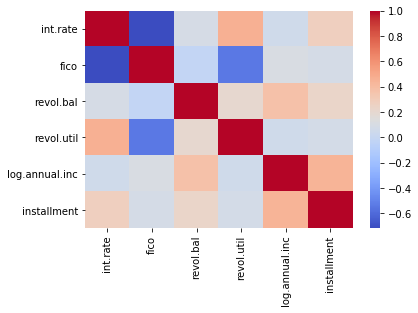

In [311]:
sns.heatmap(df[['int.rate','fico','revol.bal','revol.util','log.annual.inc','installment']].corr(),cmap='coolwarm')

## Interest Rate, Credit Policy, Small business & education as purpose, annual income are important factors

*End of Logistic Regression*

# Implementing Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [441]:
RF=RandomForestClassifier(n_estimators=233)

In [442]:
#X_train.drop(['pub.rec','delinq.2yrs','revol.util','revol.bal'],axis=1)
#X_test.drop(['pub.rec','delinq.2yrs','revol.util','revol.bal'],axis=1)

In [443]:
X_train.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'all_other', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [444]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=233,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [445]:
pred=RF.predict(X_test)

In [446]:
print(confusion_matrix(y_test,pred))

[[2388   10]
 [ 448    9]]


In [447]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2398
           1       0.47      0.02      0.04       457

    accuracy                           0.84      2855
   macro avg       0.66      0.51      0.48      2855
weighted avg       0.78      0.84      0.77      2855



In [425]:
error_rate = []

for i in range(200,250):
    
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    pred_i = rf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

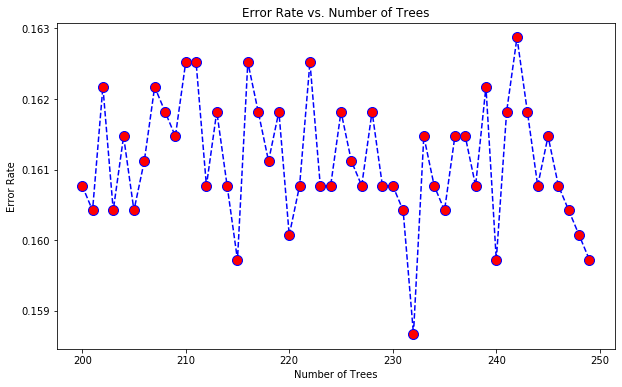

In [426]:
plt.figure(figsize=(10,6))
plt.plot(range(200,250),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')

### Similar performance compared to Logistic Regression

*End of Random Forest*

# Implementing Clustering

In [365]:
from sklearn.neighbors import KNeighborsClassifier

In [397]:
KNN=KNeighborsClassifier(n_neighbors=8)

In [398]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [399]:
pred=KNN.predict(X_test)

In [400]:
print(confusion_matrix(y_test,pred))

[[2390    8]
 [ 456    1]]


In [401]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2398
           1       0.11      0.00      0.00       457

    accuracy                           0.84      2855
   macro avg       0.48      0.50      0.46      2855
weighted avg       0.72      0.84      0.77      2855



In [432]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

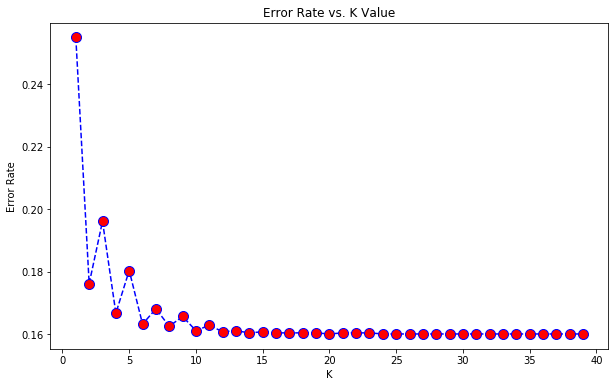

In [433]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Performs similar to Logistic Regression, with similar accuracy levels